## Observations and Insights 

In [88]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [89]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [90]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [91]:
study_results = pd.read_csv(study_results_path)
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [92]:
# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [93]:
# Checking the number of mice.
len(combined_data["Mouse ID"].unique())


249

In [99]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"], keep=False)]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [101]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_list = duplicate["Mouse ID"].unique()

In [103]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
for x in mouse_list:
    indexNames = combined_data[combined_data["Mouse ID"] == "g989"].index
    combined_data.drop(indexNames, inplace = True)

In [104]:
# Checking the number of mice in the clean DataFrame.
len(combined_data["Mouse ID"].unique())

248

## Summary Statistics

In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


tumor_vol_by_regimen = combined_data[["Drug Regimen", "Tumor Volume (mm3)"]]
mean_vol = tumor_vol_by_regimen.groupby("Drug Regimen").mean()
median_vol = tumor_vol_by_regimen.groupby("Drug Regimen").median()
var_vol = tumor_vol_by_regimen.groupby("Drug Regimen").var()
std_vol = tumor_vol_by_regimen.groupby("Drug Regimen").std()
sem_vol = tumor_vol_by_regimen.groupby("Drug Regimen").sem()

summary_df = pd.merge(mean_vol, median_vol, on="Drug Regimen")
summary_df.rename(columns={"Tumor Volume (mm3)_x": "Mean Tumor Vol", "Tumor Volume (mm3)_y": "Median Tumor Vol"}, inplace=True)

summary_df = pd.merge(summary_df, var_vol, on="Drug Regimen")
summary_df = pd.merge(summary_df, std_vol, on="Drug Regimen")
summary_df.rename(columns={"Tumor Volume (mm3)_x": "Variance of Tumor Vol", "Tumor Volume (mm3)_y": "Std Var of Tumor Vol"}, inplace=True)

summary_df = pd.merge(summary_df, sem_vol, on="Drug Regimen")
summary_df.rename(columns={"Tumor Volume (mm3)": "SEM of Tumor Vol"}, inplace=True)
summary_df

,Mean Tumor Vol,Median Tumor Vol,Variance of Tumor Vol,Std Var of Tumor Vol,SEM of Tumor Vol
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [30]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

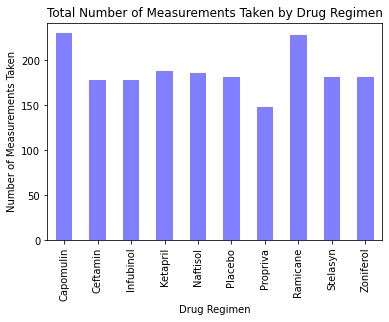

<Figure size 432x288 with 0 Axes>

In [31]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
measurement_df = combined_data[["Drug Regimen", "Mouse ID"]]
regimen_list = measurement_df.groupby("Drug Regimen")
num_meas_list = measurement_df.groupby("Drug Regimen").count()

measurement_chart = num_meas_list.plot(kind='bar', color="blue", alpha=0.5, legend=False)

# Set the xlabel and ylabel using class methods
measurement_chart.set_title("Total Number of Measurements Taken by Drug Regimen")
measurement_chart.set_xlabel("Drug Regimen")
measurement_chart.set_ylabel("Number of Measurements Taken")


plt.show()
plt.tight_layout()

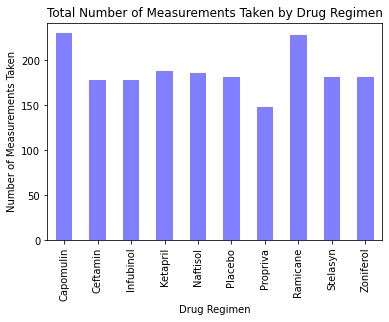

<Figure size 432x288 with 0 Axes>

In [32]:

# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

x_axis = num_meas_list.index
y_axis = num_meas_list["Mouse ID"].to_list()

plt.bar(x_axis, y_axis, color="blue", alpha=0.5, align='center', width=0.5)
plt.xticks(rotation="vertical")
plt.xlim(-0.5, len(x_axis) - 0.5)

plt.title("Total Number of Measurements Taken by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements Taken")

plt.show()
plt.tight_layout()


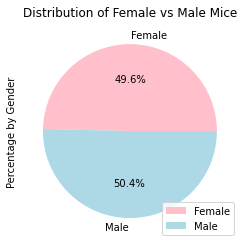

In [49]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = combined_data[["Mouse ID", "Sex"]]
gender_df = gender_df.drop_duplicates(subset="Mouse ID", keep="first")
gender_count = gender_df.groupby("Sex").count()


# Create a pie chart based upon the trip duration of that single bike
gender_pie = gender_count.plot(kind="pie", y="Mouse ID", title=("Distribution of Female vs Male Mice"), colors=["pink", "lightblue"], autopct="%1.1f%%")
plt.ylabel("Percentage by Gender")
plt.legend(loc="lower right")
plt.show()


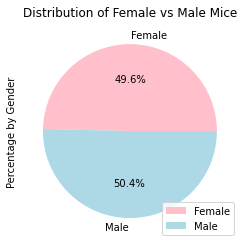

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = gender_count.index
counts = gender_count["Mouse ID"].to_list()


# The colors of each section of the pie chart
colors = ["pink", "lightblue"]

# Tells matplotlib to seperate the "Humans" section from the others

plt.pie(counts, labels=labels, colors=colors,
        autopct="%1.1f%%")

plt.title("Distribution of Female vs Male Mice")
plt.ylabel("Percentage by Gender")
plt.legend(loc="lower right")

plt.show()


## Quartiles, Outliers and Boxplots

In [43]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
sorted_df = combined_data.sort_values(["Mouse ID", "Timepoint"], ascending=False)
high_tp_df = sorted_df.drop_duplicates(subset="Mouse ID", keep="first")
high_tp_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1892,z969,Naftisol,Male,9,30,45,73.867845,4
1882,z795,Naftisol,Female,13,29,45,65.741070,3
1872,z581,Infubinol,Female,24,25,45,62.754451,3
84,z578,Ramicane,Male,11,16,45,30.638696,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
...,...,...,...,...,...,...,...,...
500,a366,Stelasyn,Female,16,29,30,63.440686,1
493,a275,Ceftamin,Female,20,28,45,62.999356,3
483,a262,Placebo,Female,17,29,45,70.717621,4
473,a251,Infubinol,Female,21,25,45,65.525743,1


In [116]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

flierprops = dict(marker='o', markerfacecolor='blue', markersize=8,
                  linestyle='none')

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in regimens:
    curr_drug_df = high_tp_df[high_tp_df["Drug Regimen"] == drug]["Tumor Volume (mm3)"]
    tumor_vol_list.append(curr_drug_df.to_list())
    quartiles = curr_drug_df.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(f"{drug} Stats")
    print("---------------------")
    print(f"Lower Quartile: {lowerq:.2f}\tUpper Quartile: {upperq:.2f}")
    print(f"Interquartile range of Tumor Volumes: {iqr:.2f}")
    print(f"Median Tumor Volume: {quartiles[0.5]:.2f}")
    print(f"Potential outliers: Values below {lower_bound:.2f} or above {upper_bound:.2f}\n")
    


Capomulin Stats
---------------------
Lower Quartile: 32.38	Upper Quartile: 40.16
Interquartile range of Tumor Volumes: 7.78
Median Tumor Volume: 38.13
Potential outliers: Values below 20.70 or above 51.83

Ramicane Stats
---------------------
Lower Quartile: 31.56	Upper Quartile: 40.66
Interquartile range of Tumor Volumes: 9.10
Median Tumor Volume: 36.56
Potential outliers: Values below 17.91 or above 54.31

Infubinol Stats
---------------------
Lower Quartile: 54.05	Upper Quartile: 65.53
Interquartile range of Tumor Volumes: 11.48
Median Tumor Volume: 60.17
Potential outliers: Values below 36.83 or above 82.74

Ceftamin Stats
---------------------
Lower Quartile: 48.72	Upper Quartile: 64.30
Interquartile range of Tumor Volumes: 15.58
Median Tumor Volume: 59.85
Potential outliers: Values below 25.36 or above 87.67



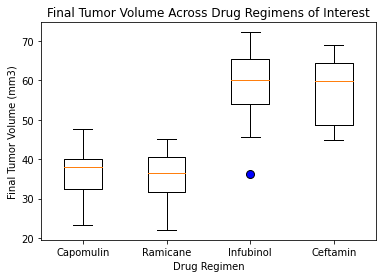

In [118]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_vol_list, showfliers=True, labels=regimens, flierprops=flierprops)
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Final Tumor Volume Across Drug Regimens of Interest")
plt.show()

## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
